## Exploratory Data Analysis (EDA) - Bike Sharing Dataset
En este notebook se realiza el análisis exploratorio de la versión modificada del dataset "Bike Sharing Dataset".
El objetivo es comprender la estructura, calidad y relaciones entre variables, preparando los datos para modelado posterior.


### Importar librerías

In [ ]:
#from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline as mpl
mpl.backend = "svg"
import os
import sys

### Importar dataset
Existen 3 formas de dataset:  
1. Desde dataset en el repositorio original
2. Desde datset en el repositorio modificado
3. Desde internet (se utiliza ucimlrepo, a veces da problemas con proxy)
4. Dataset online (bypass ucimlrepo)

In [57]:
## Seleccionar modo de importación:
## 1. Desde repositorio, original
## 2. Desde repositorio, modificado
## 3. Desde internet

dataset_selection=1

def load_dataset(dataset_selection):
    match dataset_selection:
        case 1:
            df=pd.read_csv('../data/raw/bike_sharing_original.csv')
            return df
        case 2:
            df=pd.read_csv('../data/raw/bike_sharing_modified.csv')
            return df
        case 3:
            # fetch dataset 
            bike_sharing = fetch_ucirepo(id=275) 
            
            # data (as pandas dataframes) 
            X = bike_sharing.data.features 
            y = bike_sharing.data.targets 
            
            # metadata 
            print(bike_sharing.metadata) 
            
            # variable information 
            print(bike_sharing.variables)
        case 4:
            url='https://archive.ics.uci.edu/static/public/275/data.csv'
            df=pd.read_csv(url)
            return df
        case _:
            return "Invalid option"  # Default case

df_orig=load_dataset(1)
df_mod=load_dataset(2)
df_online=load_dataset(4)

### Variable table
| Variable Name | Role     | Type         | Description                                                                                                           | Units | Missing Values |
|----------------|----------|--------------|-----------------------------------------------------------------------------------------------------------------------|--------|----------------|
| instant        | ID       | Integer      | record index                                                                                                          |        | no             |
| dteday         | Feature  | Date         | date                                                                                                                  |        | no             |
| season         | Feature  | Categorical  | 1:winter, 2:spring, 3:summer, 4:fall                                                                                  |        | no             |
| yr             | Feature  | Categorical  | year (0: 2011, 1: 2012)                                                                                               |        | no             |
| mnth           | Feature  | Categorical  | month (1 to 12)                                                                                                       |        | no             |
| hr             | Feature  | Categorical  | hour (0 to 23)                                                                                                        |        | no             |
| holiday        | Feature  | Binary       | weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)                               |        | no             |
| weekday        | Feature  | Categorical  | day of the week                                                                                                       |        | no             |
| workingday     | Feature  | Binary       | if day is neither weekend nor holiday is 1, otherwise is 0                                                            |        | no             |
| weathersit     | Feature  | Categorical  | 1: Clear, 2: Few clouds, 3: Partly cloudy, 4: Partly cloudy                                                                    |        | no             |
| temp           | Feature  | Continuous   | Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hourly)   | C      | no             |
| atemp          | Feature  | Continuous   | Normalized feeling temperature in Celsius. Derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hourly)         | C      | no             |
| hum            | Feature  | Continuous   | Normalized humidity. The values are divided by 100 (max)                                                              |        | no             |
| windspeed      | Feature  | Continuous   | Normalized wind speed. The values are divided by 67 (max)                                                             |        | no             |
| casual         | Other    | Integer      | count of casual users                                                                                                 |        | no             |
| registered     | Other    | Integer      | count of registered users                                                                                             |        | no             |
| cnt            | Target   | Integer      | count of total rental bikes including both casual and registered                                                      |        | no             |


### Basado en lo explicado en la página de Datasets por equipo, se trabaja con el dataset modificado.

"Hemos generado una versión modificada del dataset para que realicen el ejercicio de Exporatory Data Analisys (EDA) y Limpieza de Datos del primer entregable colaborativo"

In [58]:
df_mod.shape

(17726, 18)

In [59]:
df_orig.shape

(17379, 17)

In [60]:
df_orig.shape[0] - df_mod.shape[0]

-347

Se visualiza mayor cantidad de registros en el dataset modificado, lo que supone que se agregaron datos adicionales para el objetivo de la actividad

In [61]:
df_mod.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mixed_type_col
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0,702
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,8.0,32.0,40.0,831
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,5.0,27.0,32.0,175
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0,581
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0,659


In [62]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17726 entries, 0 to 17725
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   instant         17524 non-null  object
 1   dteday          17542 non-null  object
 2   season          17519 non-null  object
 3   yr              17515 non-null  object
 4   mnth            17515 non-null  object
 5   hr              17489 non-null  object
 6   holiday         17552 non-null  object
 7   weekday         17539 non-null  object
 8   workingday      17527 non-null  object
 9   weathersit      17526 non-null  object
 10  temp            17546 non-null  object
 11  atemp           17534 non-null  object
 12  hum             17512 non-null  object
 13  windspeed       17545 non-null  object
 14  casual          17523 non-null  object
 15  registered      17530 non-null  object
 16  cnt             17534 non-null  object
 17  mixed_type_col  15973 non-null  object
dtypes: obj

In [63]:
# Revisando cardinalidad de las variables, número de valores, su top y frecuencia
df_mod.describe().T

,count,unique,top,freq
instant,17524,17085,error,23
dteday,17542,1253,2012-03-30,26
season,17519,155,3.0,4243
yr,17515,128,1.0,8224
mnth,17515,190,7.0,1422
hr,17489,218,20.0,701
holiday,17552,101,0.0,16048
weekday,17539,168,6.0,2386
workingday,17527,119,1.0,11225
weathersit,17526,172,1.0,10809


Se verifica que no haya valores nulos cómo se menciona en la página origen del dataset.

In [64]:
# Revisando valores nulos en los datasets
df_orig.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [65]:
df_mod.isnull().sum().sort_values(ascending=False)

mixed_type_col    1753
hr                 237
hum                214
yr                 211
mnth               211
season             207
casual             203
instant            202
weathersit         200
workingday         199
registered         196
atemp              192
cnt                192
weekday            187
dteday             184
windspeed          181
temp               180
holiday            174
dtype: int64

In [66]:
# Se genera una copia para poder trabajar sin afectar el dataset original
df_mod_clean = df_mod.copy()

In [67]:
# La variable mixed_type_col no aporta información relevante dado que no está en el dataset original, se elimina
df_mod_clean = df_mod_clean.drop(columns=['mixed_type_col'])
# La variable instant es solo un recordID, se elimina y se reemplaza por el índice
df_mod_clean = df_mod_clean.drop(columns=['instant'])
df_mod_clean = df_mod_clean.reset_index(drop=True)
df_mod_clean['instant'] = df_mod_clean.index


In [68]:
missing_summary = pd.DataFrame({
    "column": df_mod_clean.columns,
    "missing_count": df_mod_clean.isnull().sum(),
    "missing_pct": round(df_mod_clean.isnull().sum() / len(df_mod_clean) * 100, 2)
}).sort_values("missing_pct", ascending=False)
missing_summary[missing_summary["missing_count"] > 0]

,column,missing_count,missing_pct
hr,hr,237,1.34
hum,hum,214,1.21
mnth,mnth,211,1.19
yr,yr,211,1.19
season,season,207,1.17
casual,casual,203,1.15
weathersit,weathersit,200,1.13
workingday,workingday,199,1.12
registered,registered,196,1.11
cnt,cnt,192,1.08


Se observan valores nulos en el dataset modificado, por lo que habrá que revisar los valores para identificar mecanismos de imputación.

In [69]:
# Revisando tipos de datos
df_orig.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [70]:
df_mod_clean.dtypes

dteday        object
season        object
yr            object
mnth          object
hr            object
holiday       object
weekday       object
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt           object
instant        int64
dtype: object

Se verifican los tipos de datos de las variables y también se ven que están alteradas en el modificado.

In [71]:
# Revisando duplicados en los datasets
df_mod_clean.duplicated().sum()

np.int64(0)

In [72]:
df_mod_clean.describe(include=['object','number']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dteday,17542,1253,2012-03-30,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17519,155,3.0,4243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,17515,128,1.0,8224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,17515,190,7.0,1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr,17489,218,20.0,701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,17552,101,0.0,16048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,17539,168,6.0,2386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,17527,119,1.0,11225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weathersit,17526,172,1.0,10809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,17546,281,0.62,689,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Debido a la alta cardinalidad en el df_mod_clean que se piensa es debido a que todas las columnas están en tipo "objeto"
Se hará la conversión de tipado de los datos para poder analizar las distribuciones de forma correcta

In [73]:
# Primero se identifican los patrones de datos inválidos en las columnas
# Se reemplazan por NaN
invalid_patterns = ['nan', 'NaN', 'NAN', 'null', 'NULL', 'none', 'None', 'NONE', 
                       'unknown', 'Unknown', 'UNKNOWN', 'error', 'Error', 'ERROR',
                       'invalid', 'Invalid', 'INVALID', 'missing', 'Missing', 'MISSING',
                       'n/a', 'N/A', 'na', 'NA', '#N/A', '#NULL!', '#DIV/0!', '', ' ','bad','Bad','BAD','?']

for col in df_mod_clean.select_dtypes(include=['object']).columns:
    df_mod_clean[col] = df_mod_clean[col].replace(
        invalid_patterns,
        pd.NA
    )

In [74]:
df_mod_clean.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dteday,17542,1253,2012-03-30,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17475,152,3.0,4243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,17456,125,1.0,8224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,17459,187,7.0,1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr,17441,215,20.0,701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,17491,98,0.0,16048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,17494,165,6.0,2386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,17477,116,1.0,11225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weathersit,17472,169,1.0,10809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,17503,278,0.62,689,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se han eliminado en los top valores de 'error', lo que hace ver que se ha limpiado la data

In [75]:
# Procedemos con la conversión de tipos de datos
# Se identifican las columnas por tipo de dato
# Se convierten las columnas a su tipo de dato correspondiente
# Se usa 'Int64' y 'Float64' para permitir valores NaN en columnas numéricas
# Se usa dt.date para convertir a fecha sin tiempo
int_columns = ['instant', 'season','yr','mnth','hr','holiday','weekday','workingday', 'weathersit', 'casual', 'registered', 'cnt']
float_columns = ['temp', 'atemp', 'hum', 'windspeed']
date_columns = ['dteday']

df_mod_clean['dteday'] = df_mod_clean['dteday'].astype(str).str.strip()


for col in int_columns:
    df_mod_clean[col] = pd.to_numeric(df_mod_clean[col], errors='coerce').astype('Int64')
for col in float_columns:
    df_mod_clean[col] = pd.to_numeric(df_mod_clean[col], errors='coerce').astype('Float64')
for col in date_columns:
    df_mod_clean[col] = pd.to_datetime(df_mod_clean[col], errors='coerce').dt.date

print(df_mod_clean.dtypes)


dteday         object
season          Int64
yr              Int64
mnth            Int64
hr              Int64
holiday         Int64
weekday         Int64
workingday      Int64
weathersit      Int64
temp          Float64
atemp         Float64
hum           Float64
windspeed     Float64
casual          Int64
registered      Int64
cnt             Int64
instant         Int64
dtype: object


In [76]:
# validamos que se vea bien el dataset despues de la conversión.
df_mod_clean.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,instant
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0.0,8,32,40,1
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0.0,5,27,32,2
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,3
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,5
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0.0,2,0,2,6
7,2011-01-01,1,0,1,314,0,6,0,1,0.2,0.2576,0.86,0.0,1,2,3,7
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0,1,7,8,8
9,2011-01-01,1,<NA>,1,9,0,6,0,1,0.32,0.3485,0.76,0.0,8,6,14,9


In [77]:
# Revisando cardinalidad de las variables numéricas
df_mod_clean.describe(include=['number', 'float']).T

,count,mean,std,min,25%,50%,75%,max
season,17462.0,5.435059,40.828996,1.0,2.0,3.0,4.0,985.0
yr,17452.0,3.104343,41.013759,0.0,0.0,1.0,1.0,1139.0
mnth,17444.0,10.905354,51.858621,1.0,4.0,7.0,10.0,1089.0
hr,17433.0,17.116388,67.641675,0.0,6.0,12.0,18.0,1955.0
holiday,17477.0,2.915374,43.483761,0.0,0.0,0.0,0.0,985.0
weekday,17480.0,7.089188,96.961092,0.0,1.0,3.0,5.0,11286.0
workingday,17464.0,3.182089,39.979501,0.0,0.0,1.0,1.0,971.0
weathersit,17460.0,4.972795,46.843781,1.0,1.0,1.0,2.0,989.0
temp,17490.0,3.575313,45.033474,0.02,0.34,0.5,0.66,999.46
atemp,17474.0,3.823939,46.809246,0.0,0.3333,0.4848,0.6212,985.4545


Se ven datos máximos en las columnas numéricas sin sentido cómo working days mayor a 6, holiday diferente de 0 y 1, workingday diferente a 0 o 1, yr diferente de 0 y 1, se validó vs lo que describe el dataset original que serían las reglas de negocio para tomar el data quality del dataset.

In [78]:
# Verificando distribuciones de las variables numéricas en el dataset original
df_orig.describe(include=['number', 'float']).T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [79]:
# Definición de las reglas de negocio para las variables del dataset y validación de data quality.
reglas_negocio = {
    'yr': lambda x: x.isin([0, 1]),
    'mnth': lambda x: x.between(1, 12),
    'holiday': lambda x: x.isin([0, 1]),
    'weekday': lambda x: x.between(0, 6),
    'workingday': lambda x: x.isin([0, 1]),
    'weathersit': lambda x: x.isin([1, 2, 3, 4]),
    'season': lambda x: x.isin([1, 2, 3, 4])
}
for col, rule in reglas_negocio.items():
    if col in df_mod_clean.columns:
        invalid_entries = df_mod_clean[~rule(df_mod_clean[col])]
        if not invalid_entries.empty:
            print(f"Invalid entries found in column '{col}':")
        else:
            print(f"All entries in column '{col}' are valid according to the business rules.")
    else:
        print(f"Column '{col}' not found in the DataFrame.")


Invalid entries found in column 'yr':
Invalid entries found in column 'mnth':
Invalid entries found in column 'holiday':
Invalid entries found in column 'weekday':
Invalid entries found in column 'workingday':
Invalid entries found in column 'weathersit':
Invalid entries found in column 'season':


## Búsqueda de outliers en df_mod

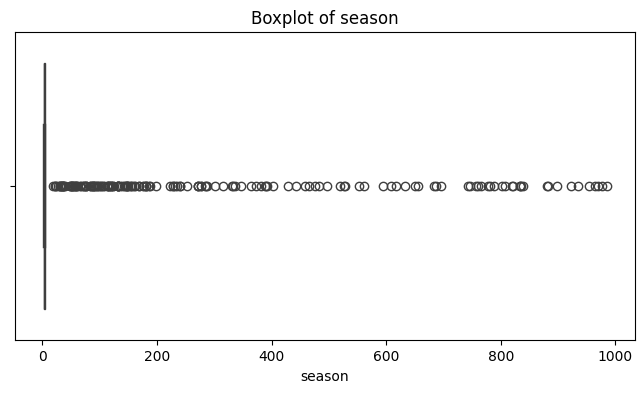

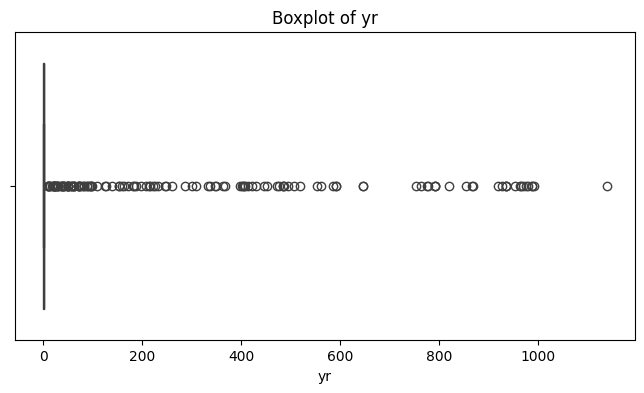

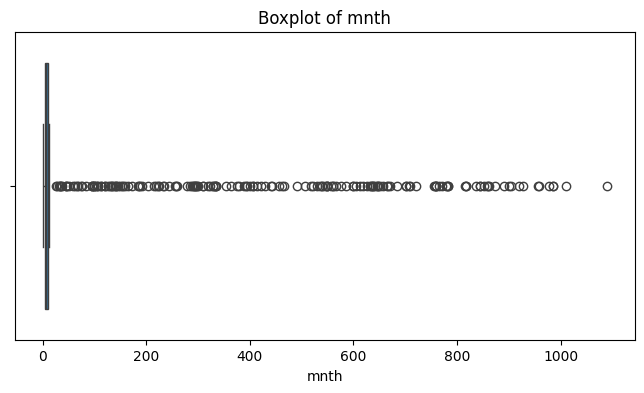

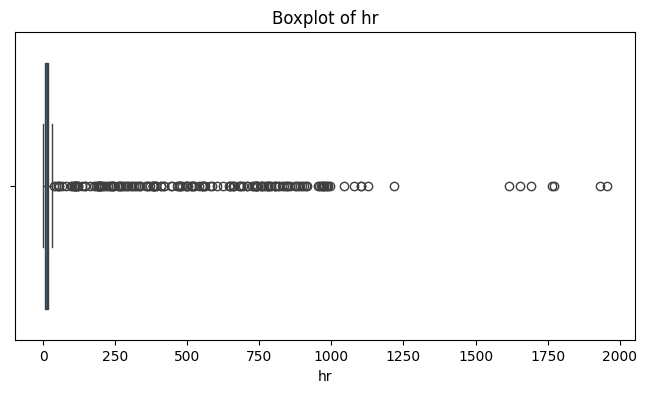

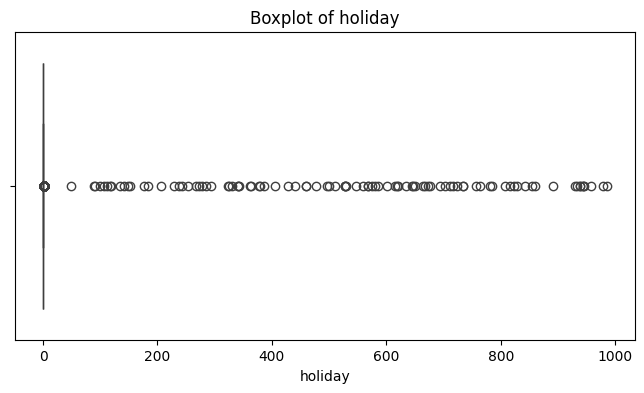

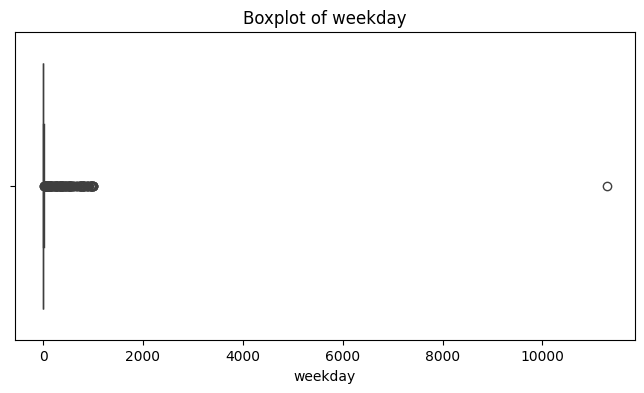

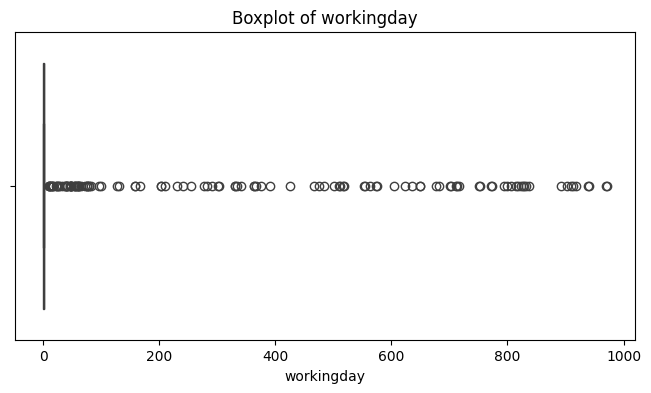

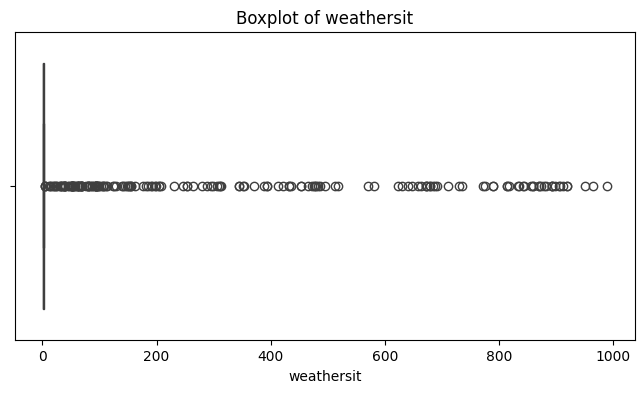

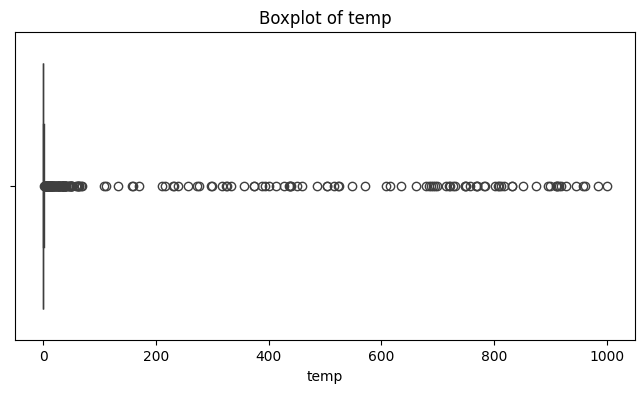

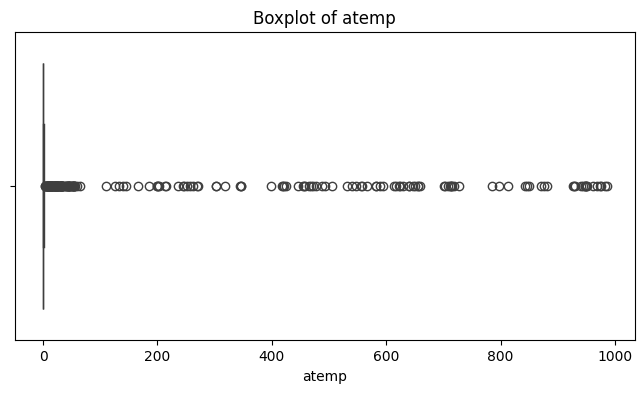

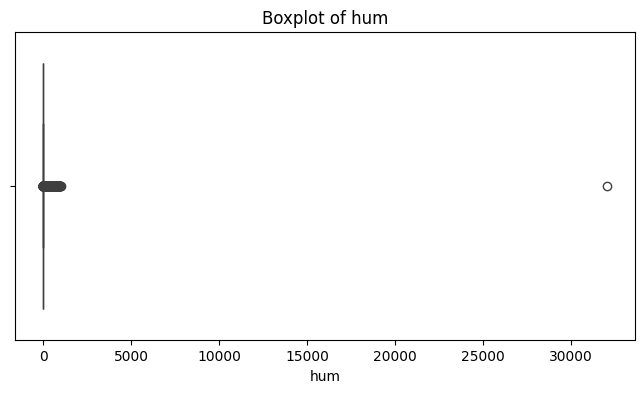

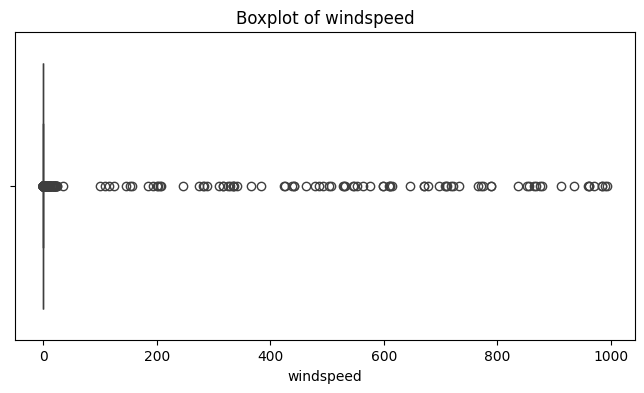

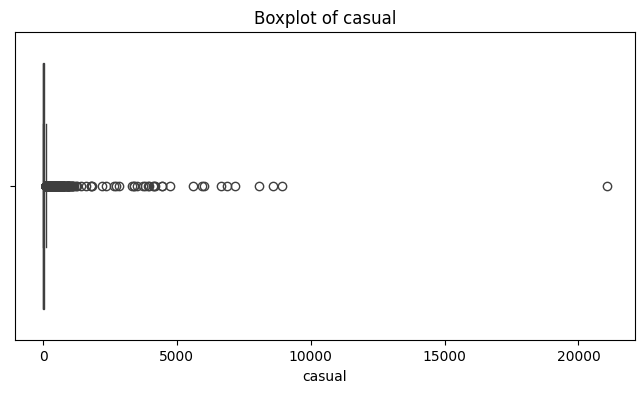

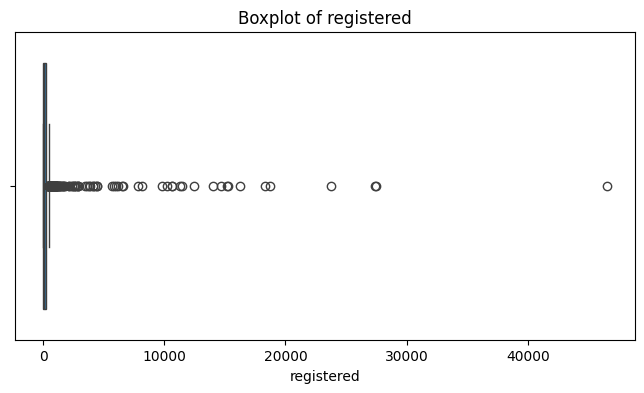

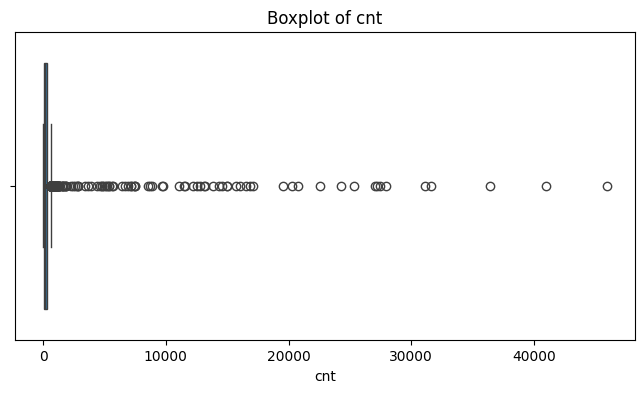

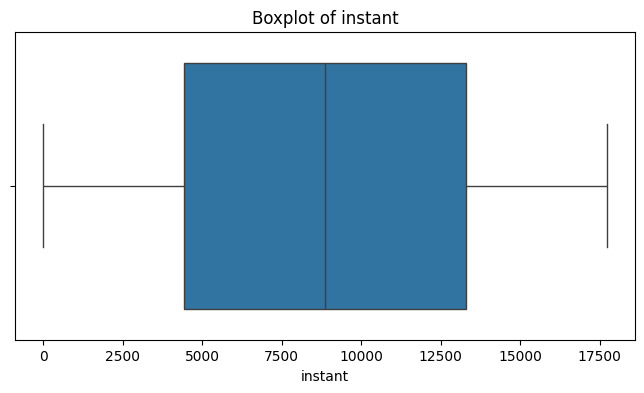

In [80]:
numeric_cols = df_mod_clean.select_dtypes(include=['number', 'float']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_mod_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Dado que hay demasiados outliers en todas las variables, se quiere revisar las distribuciones quitando los outliers

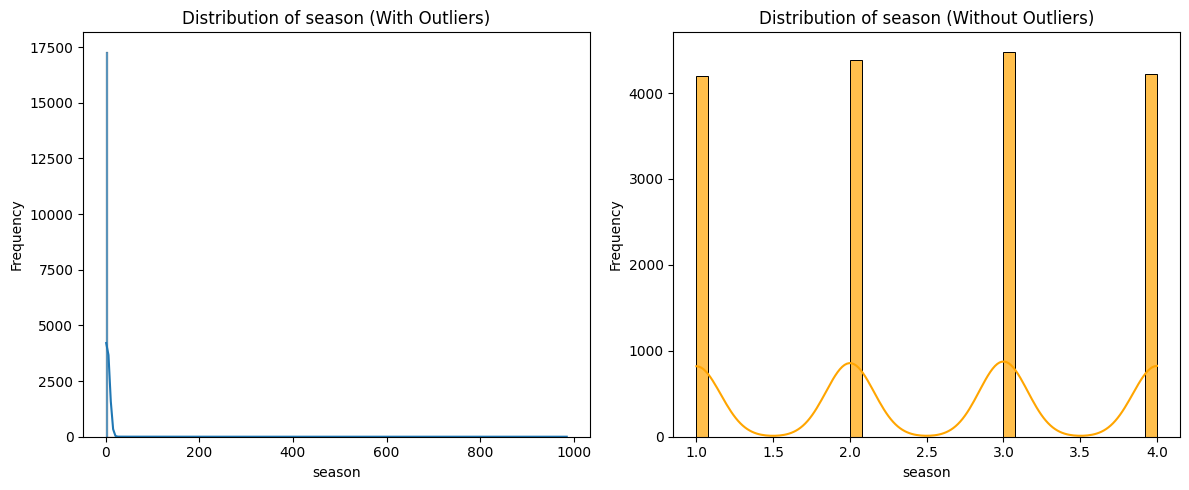

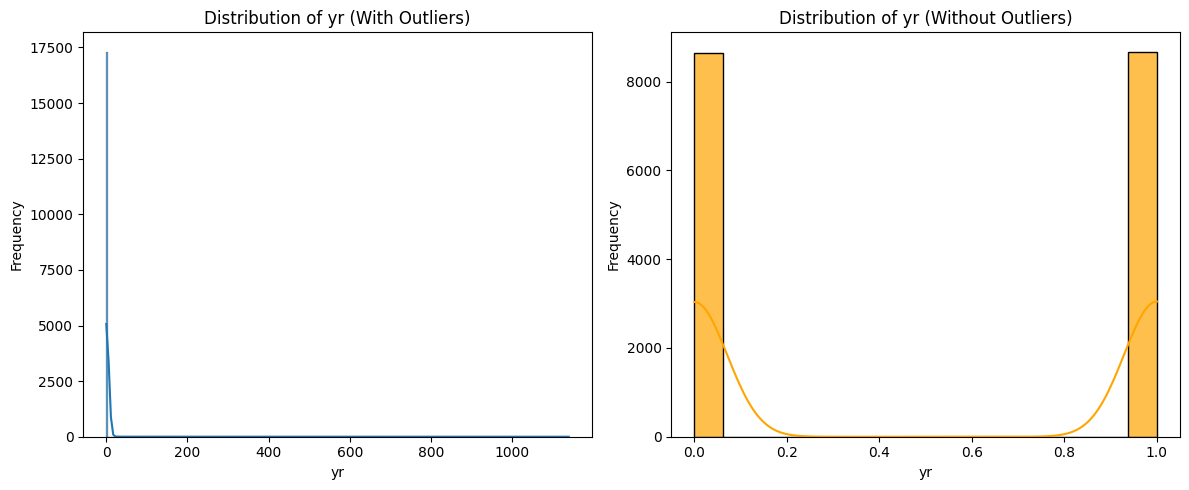

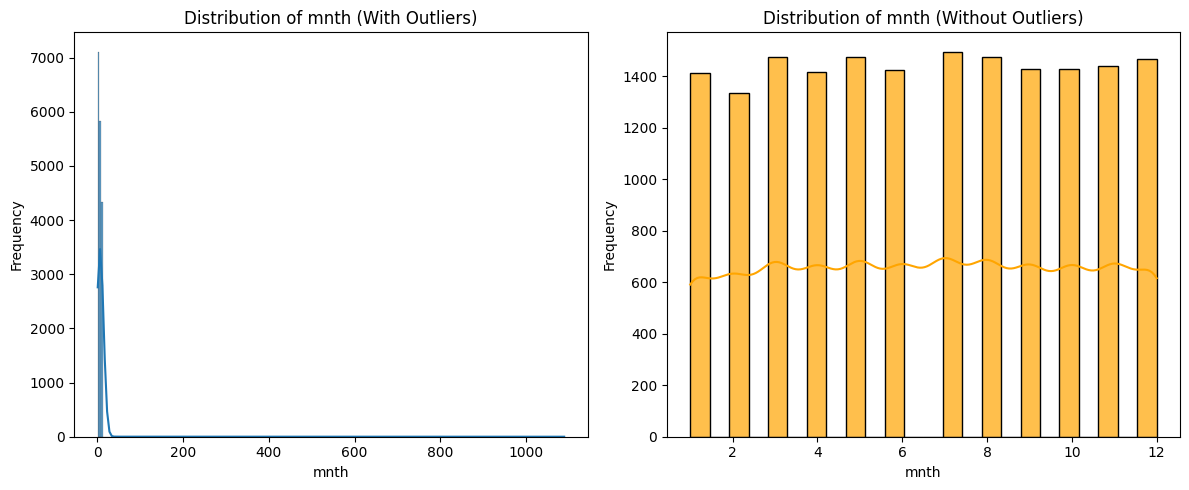

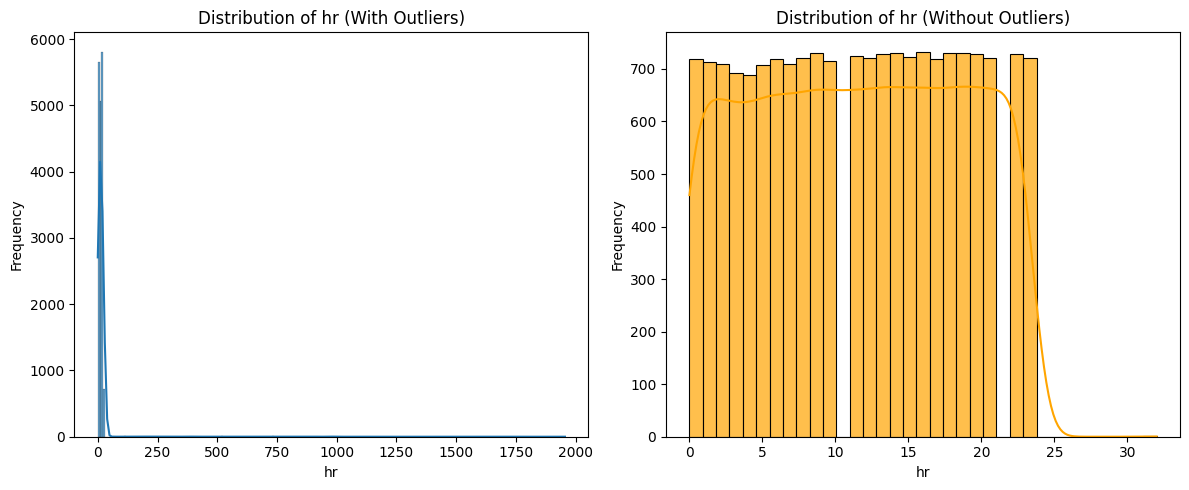

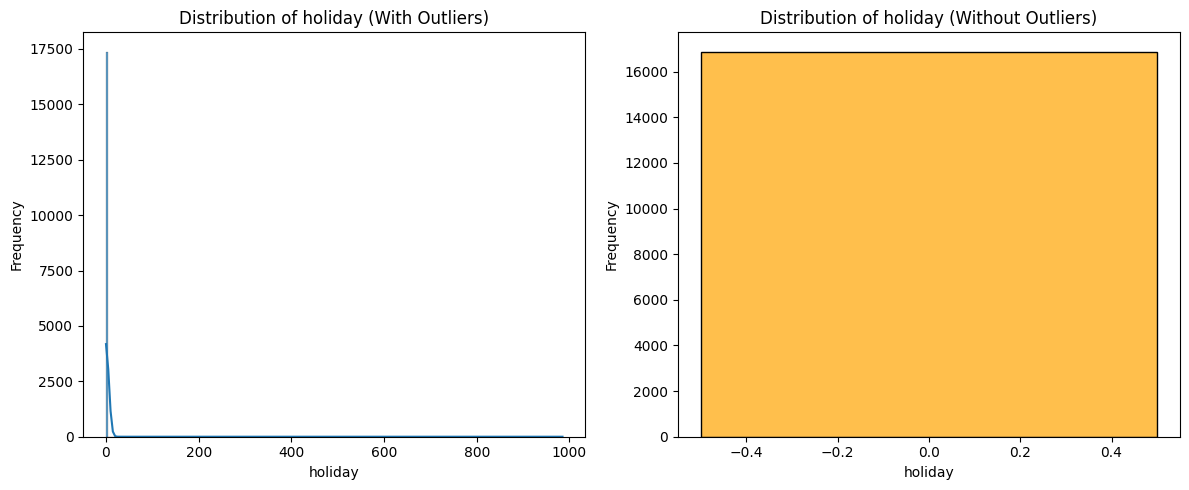

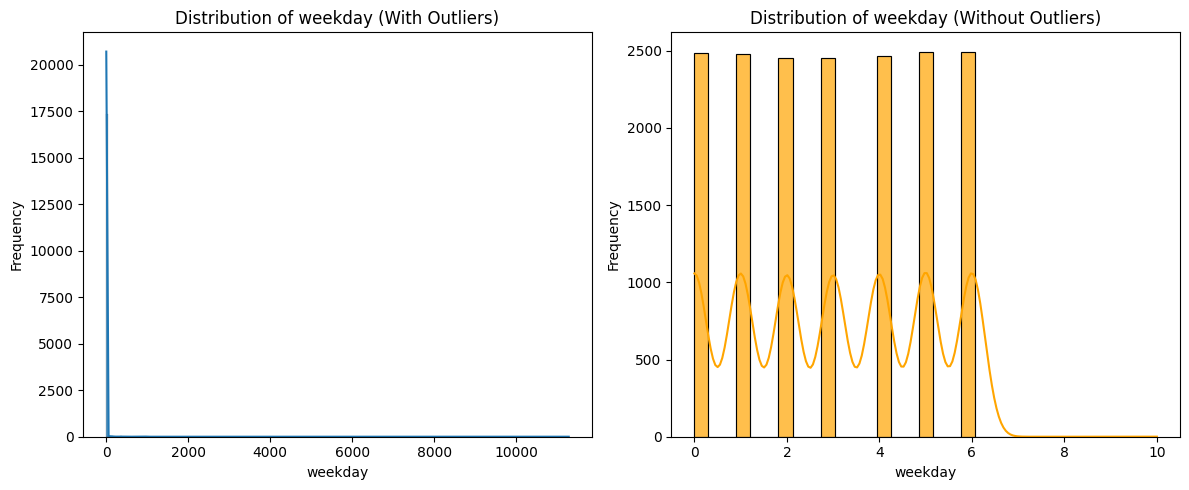

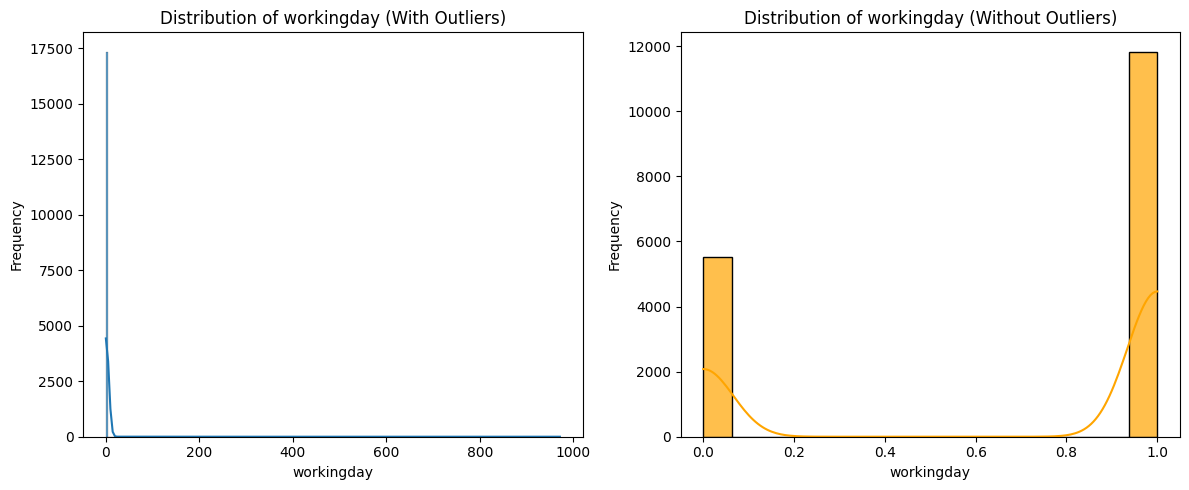

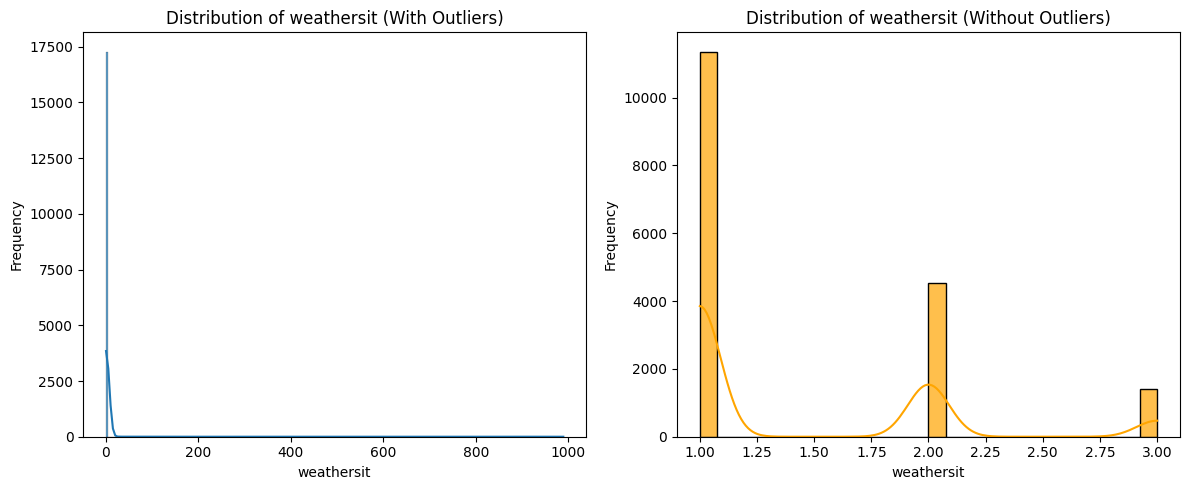

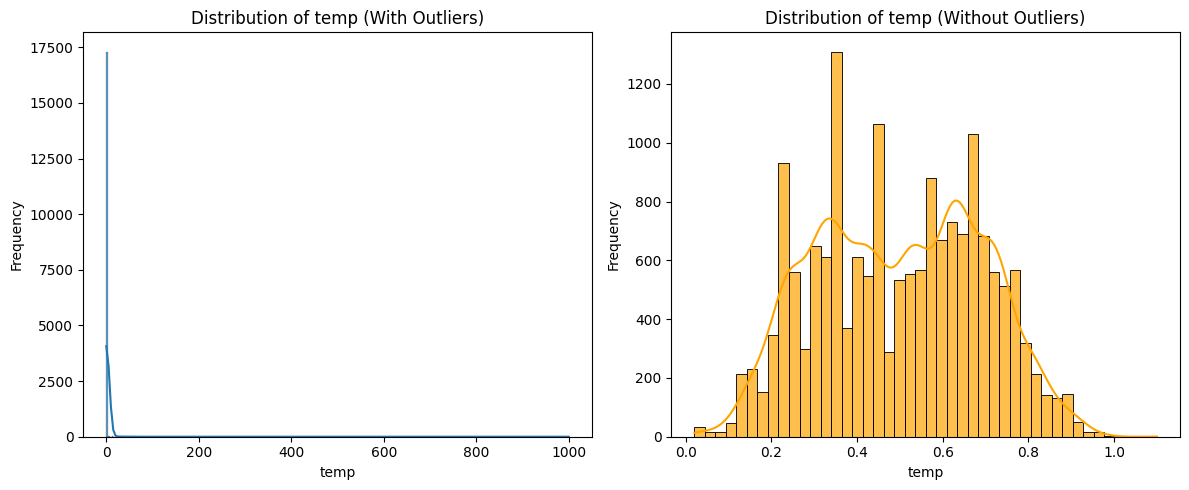

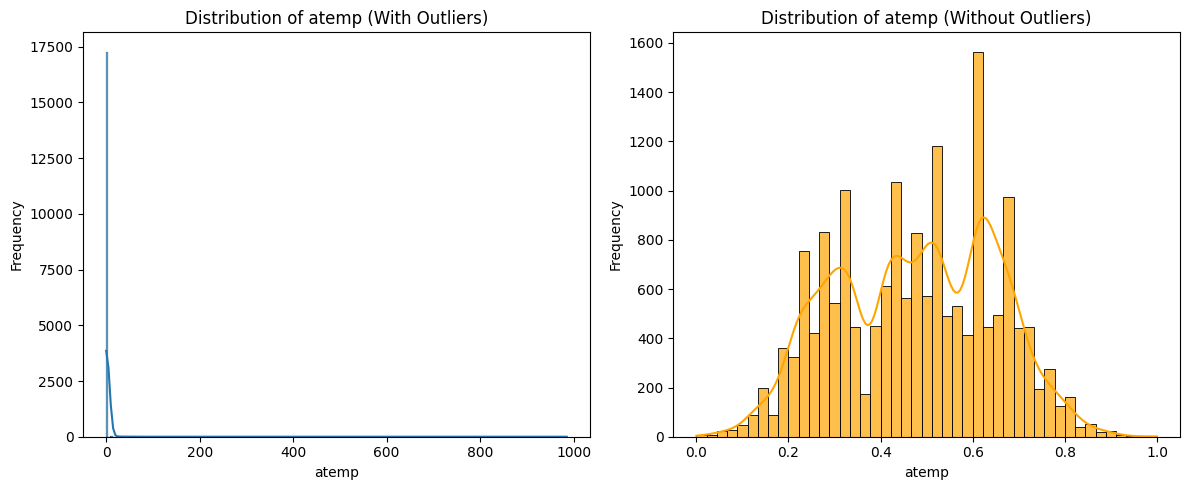

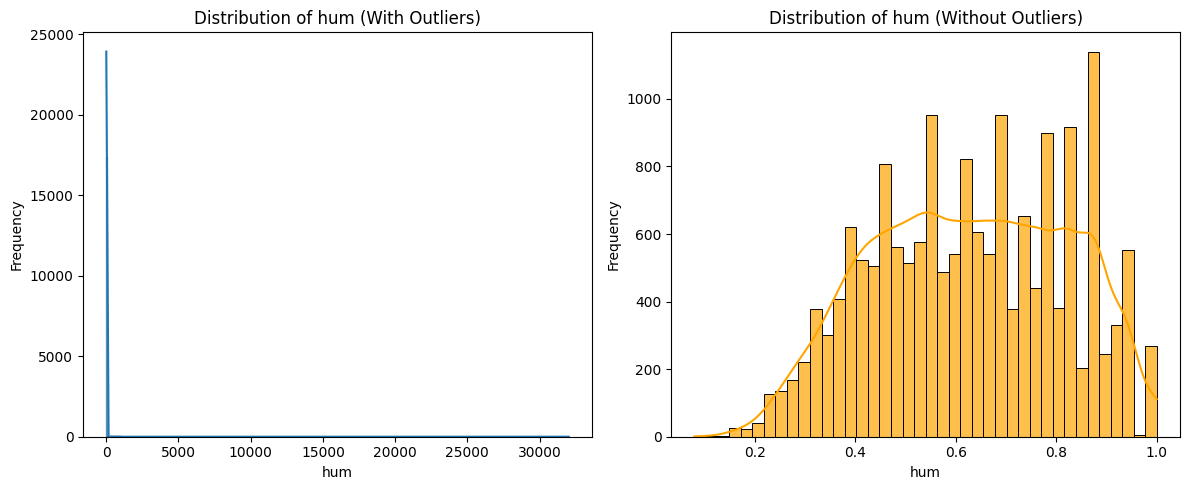

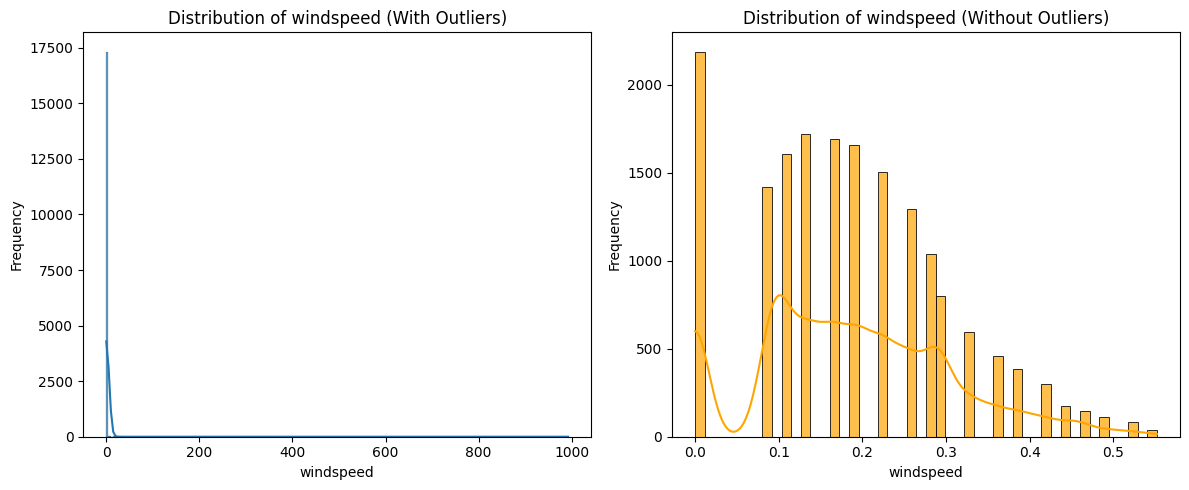

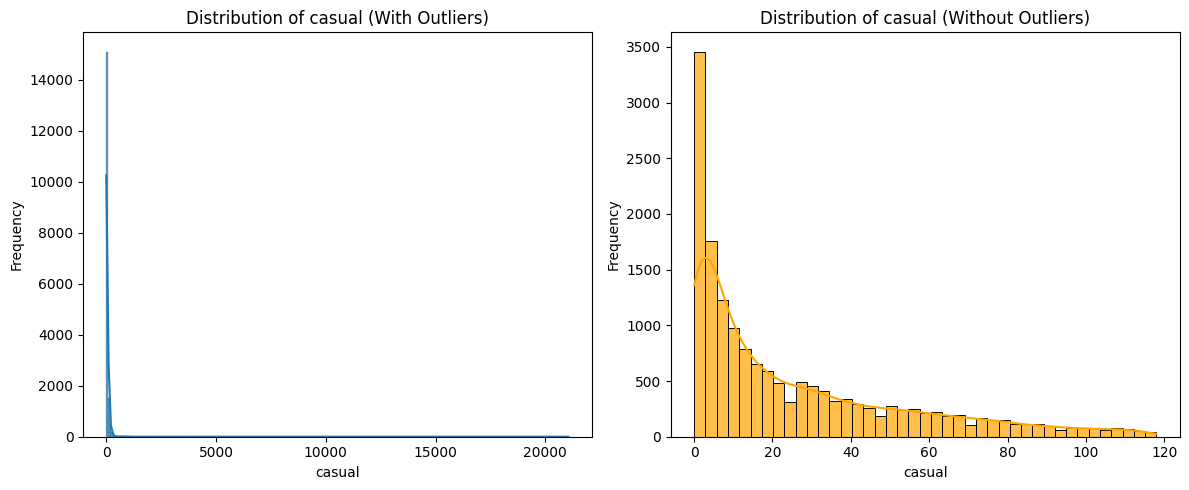

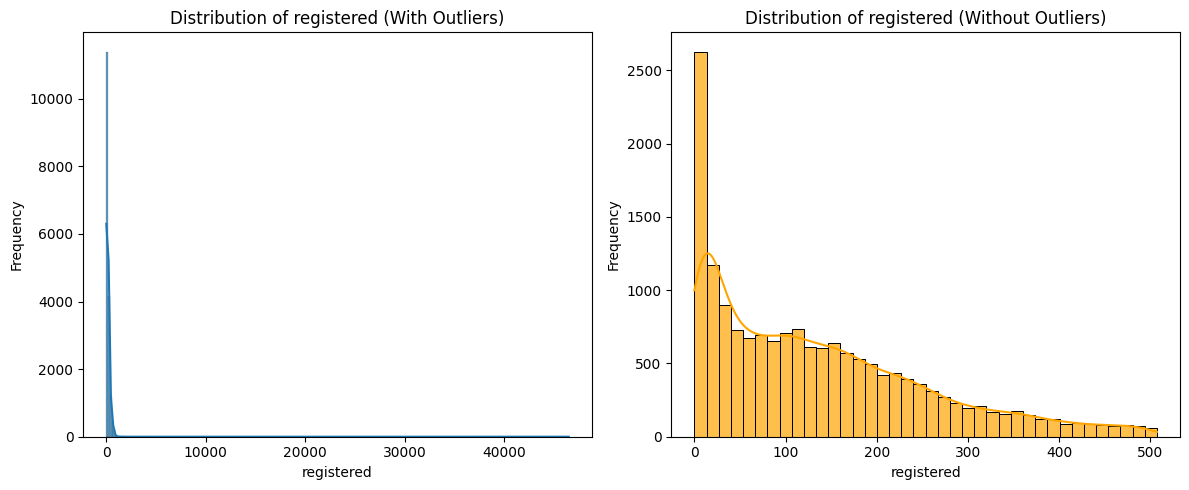

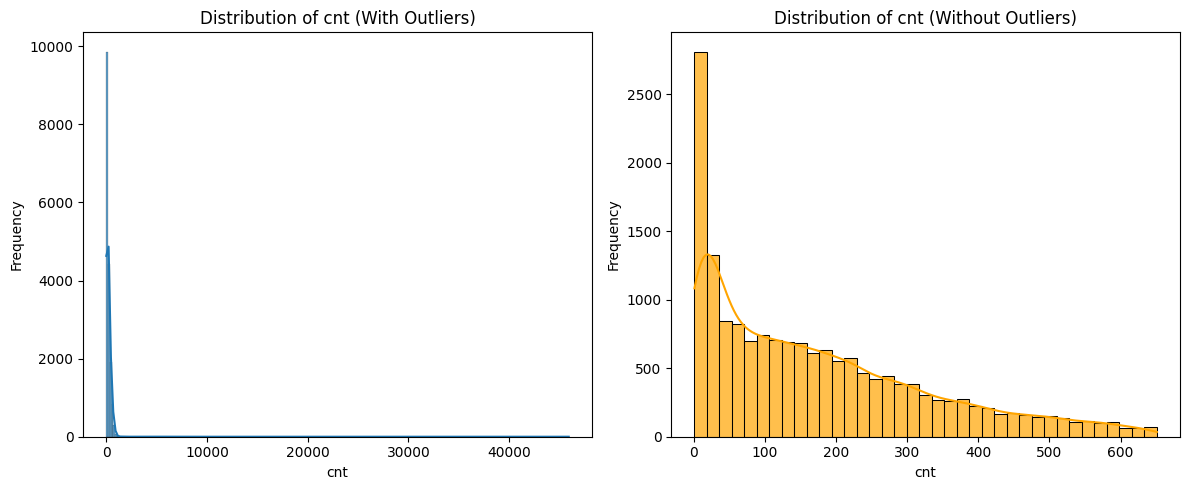

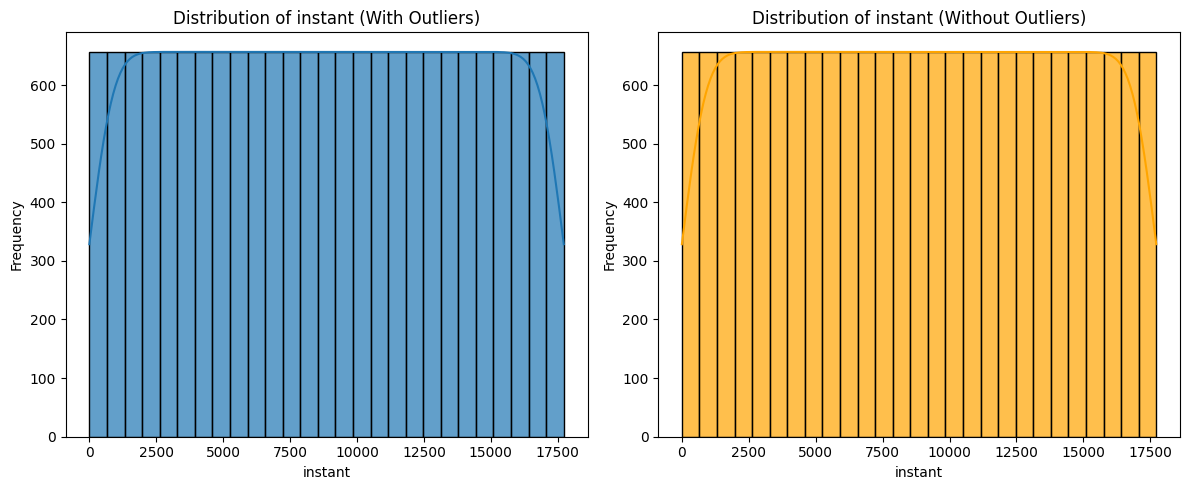

In [81]:
def plot_distribution_without_outliers(df, column):
    plt.figure(figsize=(12, 5))
    
    # Calculate IQR for outlier detection
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data without outliers
    data_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column]
    
    # Create subplots
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), kde=True, alpha=0.7, label='With outliers')
    plt.title(f'Distribution of {column} (With Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data_no_outliers.dropna(), kde=True, alpha=0.7, color='orange', label='Without outliers')
    plt.title(f'Distribution of {column} (Without Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    # print(f"\n{column} - Summary:")
    # print(f"Original data points: {len(df[column].dropna())}")
    # print(f"Data points without outliers: {len(data_no_outliers)}")
    # print(f"Outliers removed: {len(df[column].dropna()) - len(data_no_outliers)}")
    # print(f"Outlier bounds: [{lower_bound:.3f}, {upper_bound:.3f}]")
    # print("-" * 50)
for col in numeric_cols:
    plot_distribution_without_outliers(df_mod_clean, col)

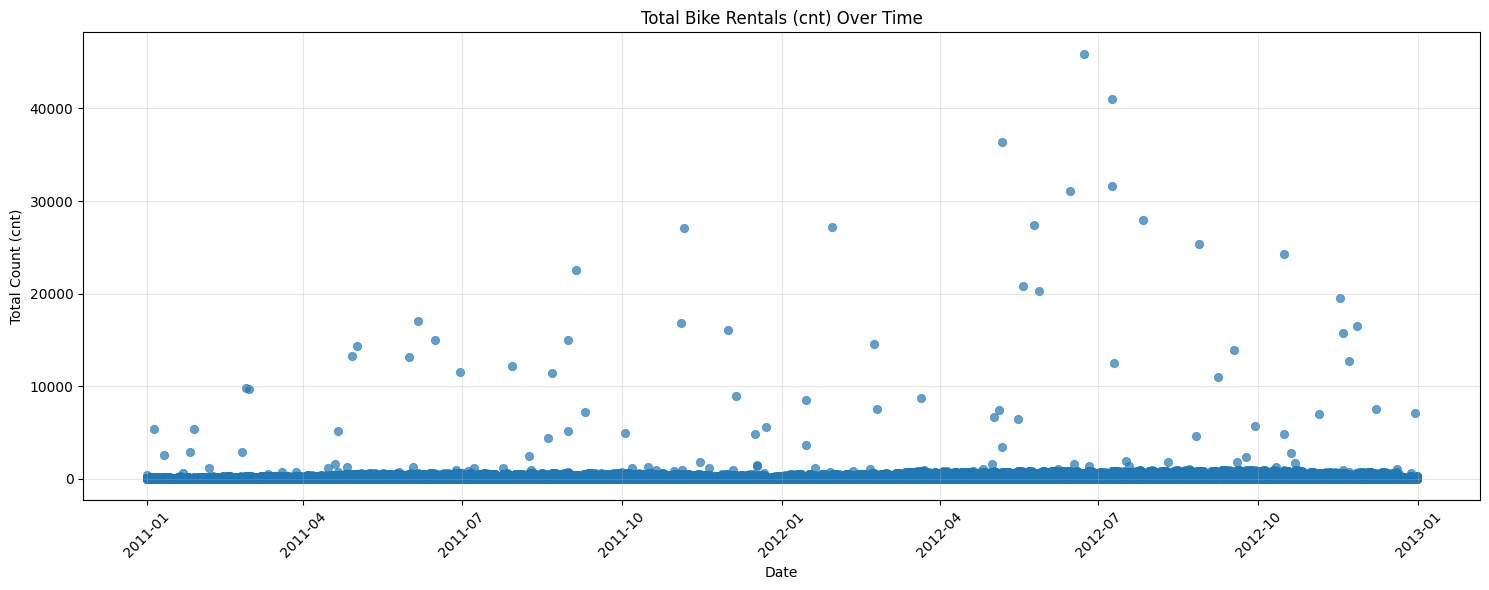

In [82]:
df_mod_clean['dteday_dt'] = pd.to_datetime(df_mod_clean['dteday'], errors='coerce')

plt.figure(figsize=(15, 6))
plt.scatter(df_mod_clean['dteday_dt'], df_mod_clean['cnt'], alpha=0.7, linewidth=0.5)
plt.title('Total Bike Rentals (cnt) Over Time')
plt.xlabel('Date')
plt.ylabel('Total Count (cnt)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

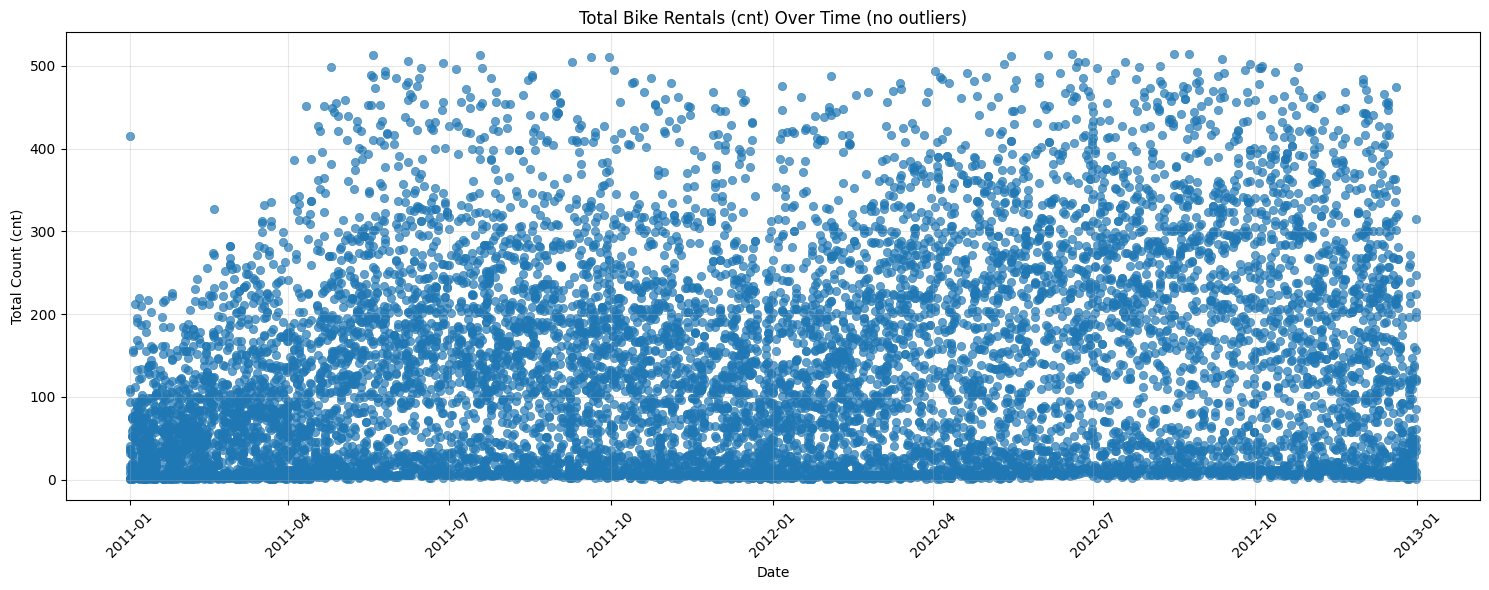

In [83]:
df_no_outliers['dteday_dt'] = pd.to_datetime(df_no_outliers['dteday'], errors='coerce')

plt.figure(figsize=(15, 6))
plt.scatter(df_no_outliers['dteday_dt'], df_no_outliers['cnt'], alpha=0.7, linewidth=0.5)
plt.title('Total Bike Rentals (cnt) Over Time (no outliers)')
plt.xlabel('Date')
plt.ylabel('Total Count (cnt)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

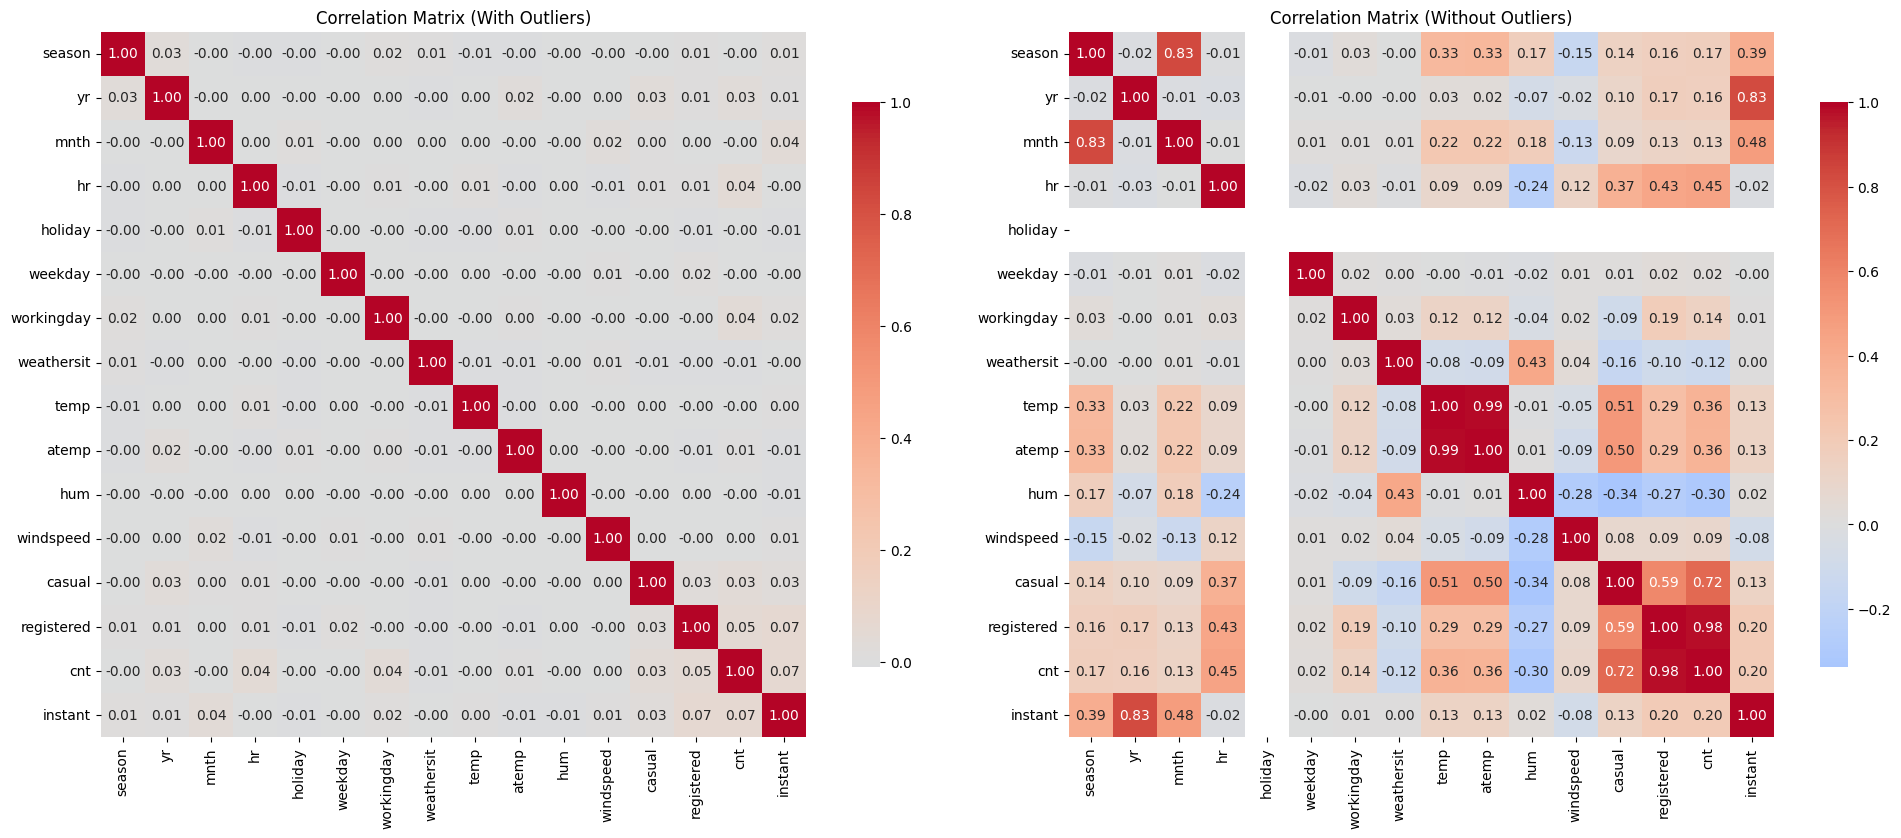

In [86]:
# Función para remover outliers usando IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Crear copia del dataset para remover outliers
df_no_outliers = df_mod_clean.copy()

# Remover outliers de cada variable numérica
for col in numeric_cols:
    df_no_outliers = remove_outliers(df_no_outliers, col)

# Crear matriz de correlación sin outliers
correlation_matrix= df_mod_clean.select_dtypes(include=['number', 'float']).corr()
correlation_matrix_no_outliers = df_no_outliers.select_dtypes(include=['number', 'float']).corr()

# Visualizar ambas matrices de correlación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Matriz con outliers
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, ax=ax1)
ax1.set_title('Correlation Matrix (With Outliers)')

# Matriz sin outliers
sns.heatmap(correlation_matrix_no_outliers, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, ax=ax2)
ax2.set_title('Correlation Matrix (Without Outliers)')

plt.tight_layout()
plt.show()


In [90]:
df_mod_clean.to_csv('../data/clean/bike_sharing_cleaned.csv', index=False)
df_no_outliers.to_csv('../data/clean/bike_sharing_no_outliers.csv', index=False)

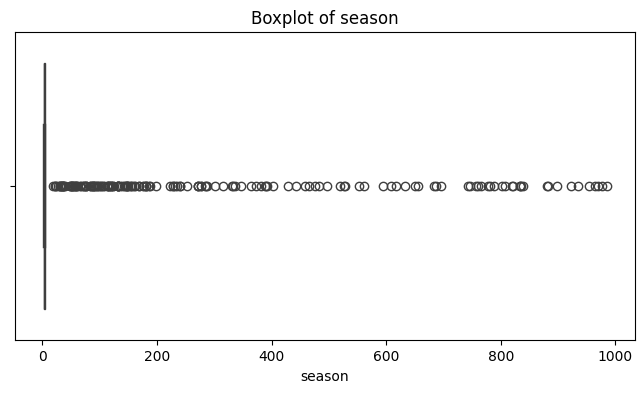

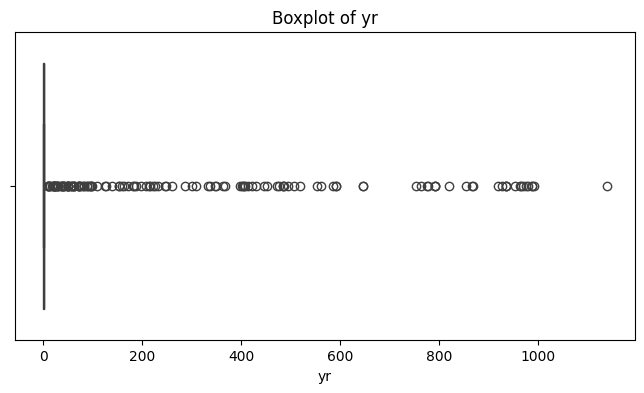

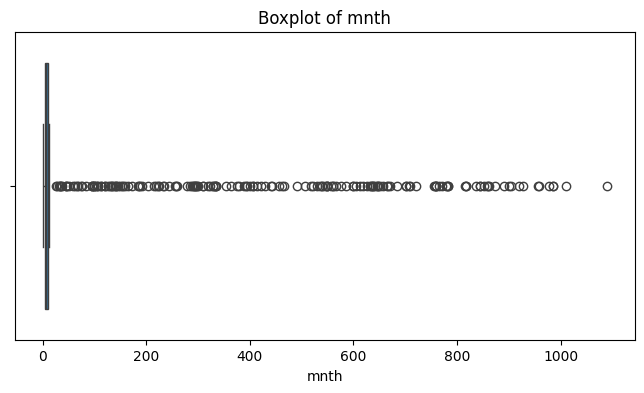

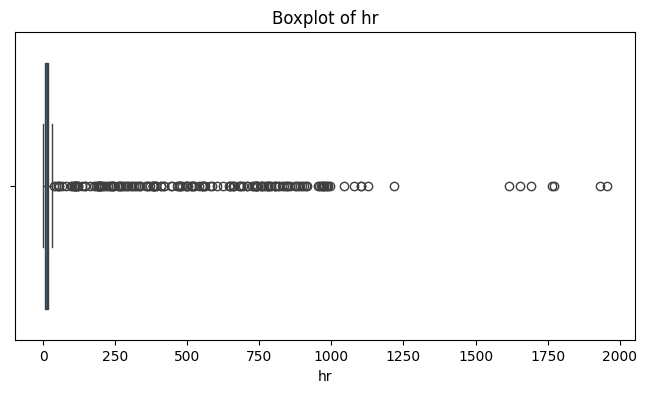

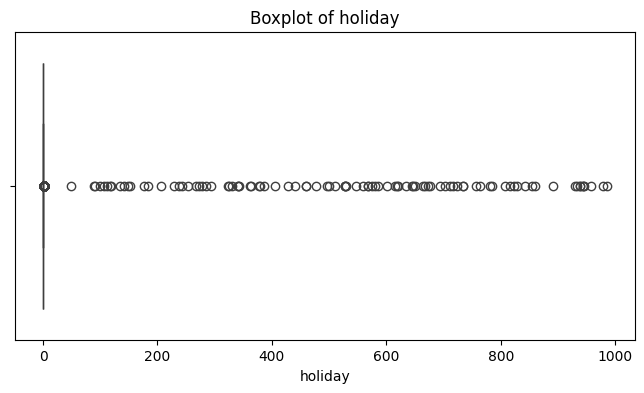

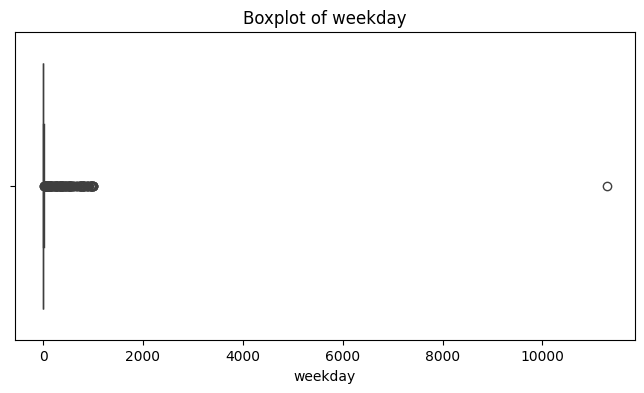

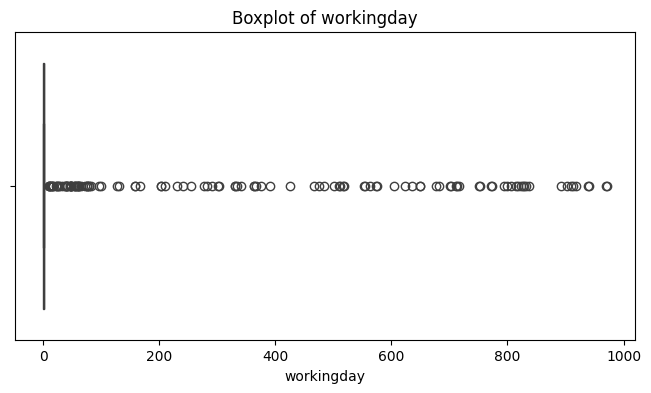

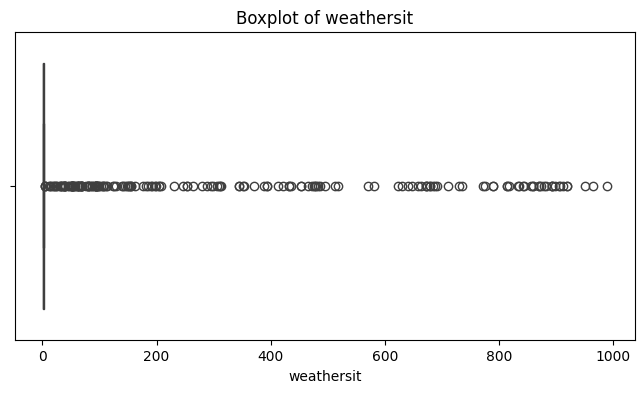

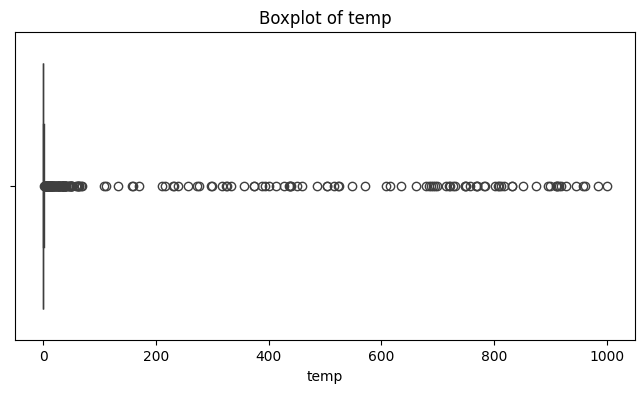

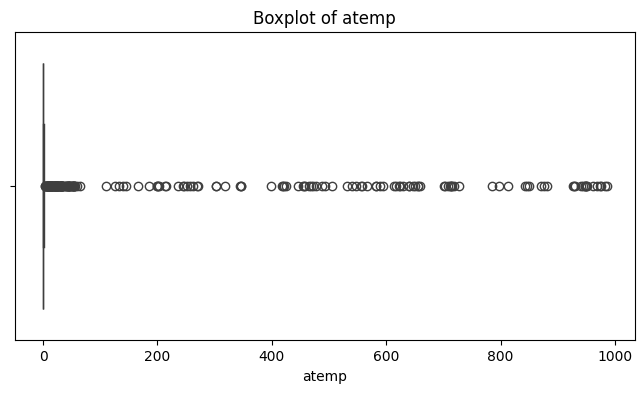

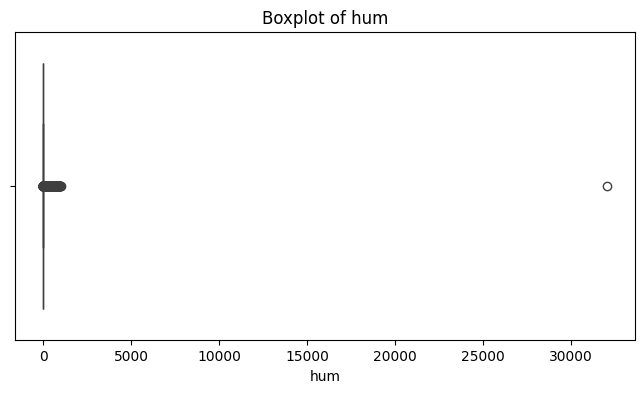

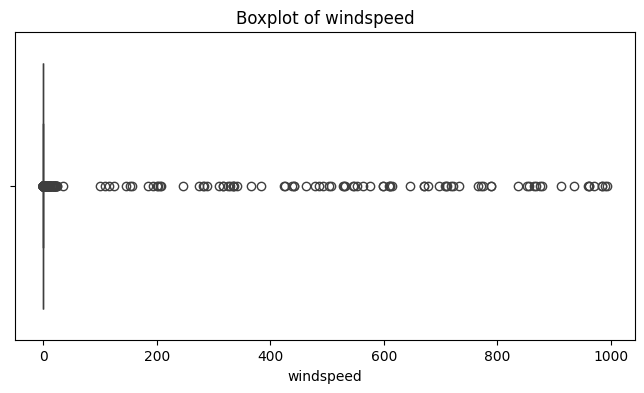

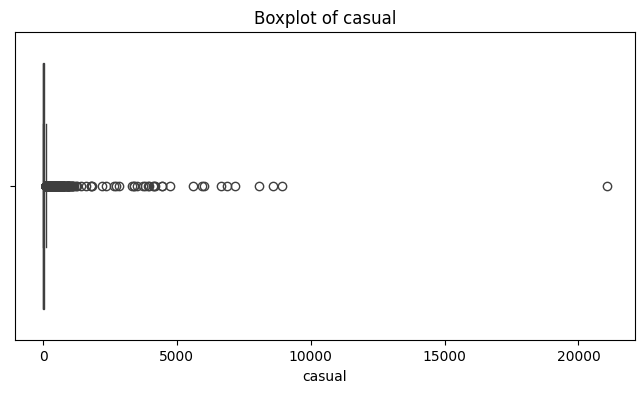

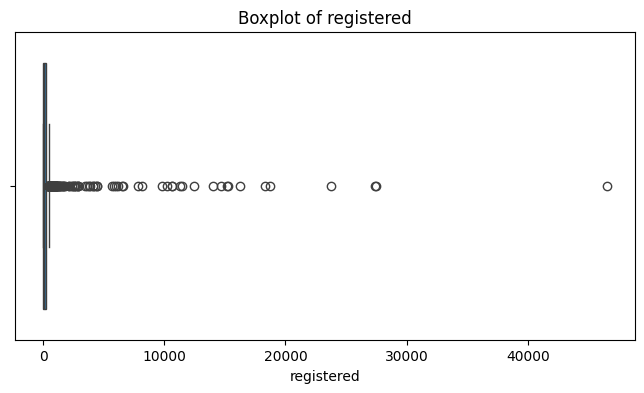

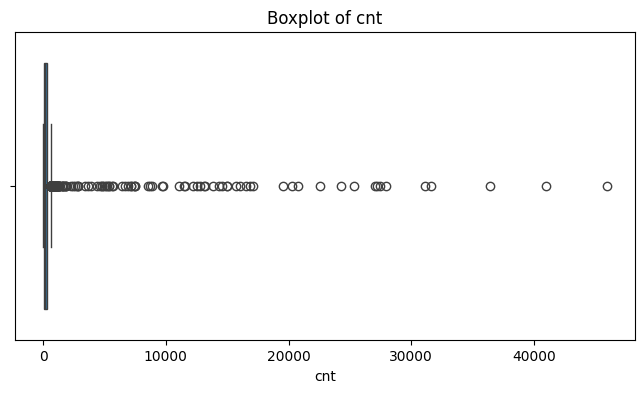

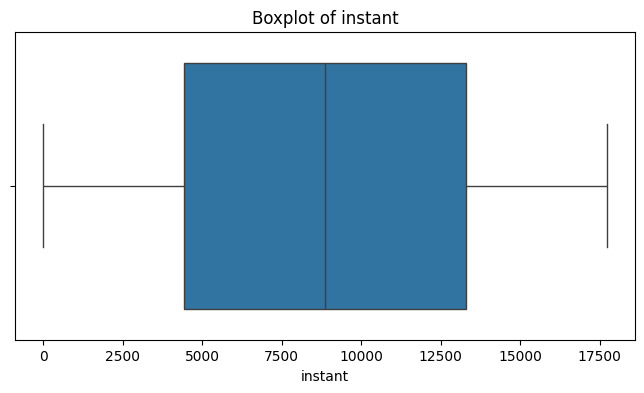

In [88]:
# Búsqueda y tratamiento de outliers en df_mod
numeric_cols = df_mod_clean.select_dtypes(include=['number', 'float']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_mod_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [89]:
# Revisando el efecto del tratamiento de outliers en las variables numéricas
df_mod_clean.describe(include=['number', 'float']).T
# Falta procesar la variable de holiday

,count,mean,std,min,25%,50%,75%,max
season,17462.0,5.435059,40.828996,1.0,2.0,3.0,4.0,985.0
yr,17452.0,3.104343,41.013759,0.0,0.0,1.0,1.0,1139.0
mnth,17444.0,10.905354,51.858621,1.0,4.0,7.0,10.0,1089.0
hr,17433.0,17.116388,67.641675,0.0,6.0,12.0,18.0,1955.0
holiday,17477.0,2.915374,43.483761,0.0,0.0,0.0,0.0,985.0
weekday,17480.0,7.089188,96.961092,0.0,1.0,3.0,5.0,11286.0
workingday,17464.0,3.182089,39.979501,0.0,0.0,1.0,1.0,971.0
weathersit,17460.0,4.972795,46.843781,1.0,1.0,1.0,2.0,989.0
temp,17490.0,3.575313,45.033474,0.02,0.34,0.5,0.66,999.46
atemp,17474.0,3.823939,46.809246,0.0,0.3333,0.4848,0.6212,985.4545


Se podria imputar 1 cuando es working_day = 0 y 0 cuando working_day = 1, validemos si es el patrón que se cumple.

In [ ]:
# df_mod_clean[(df_mod_clean['workingday'].isin([1]))][['holiday','weekday']].value_counts()

In [ ]:
# df_mod_clean[(df_mod_clean['workingday'].isin([0]))][['holiday','weekday']].value_counts()